In [1]:
import netCDF4 as nc

#PATH_HYCOM = '../data/HYCOM/GLBa0_expt_91.nc4'
PATH_GEBCO = '../data/GEBCO_Bathymetry/GEBCO_25_Oct_2023_ba927c4c060f/gebco_2023_n52.0_s44.0_w-74.0_e-53.0.nc'

ds = nc.Dataset(PATH_GEBCO)


In [2]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: The GEBCO_2023 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals
    summary: The GEBCO_2023 Grid is a continuous, global terrain model for ocean and land with a spatial resolution of 15 arc seconds.The grid uses as a base-map Version 2.5.5 of the SRTM15+ data set (Tozer et al, 2019). This data set is a fusion of land topography with measured and estimated seafloor topography. It is augmented with gridded bathymetric data sets developed as part of the Nippon Foundation-GEBCO Seabed 2030 Project.
    keywords: BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ELEVATION/DIGITAL TERRAIN MODELS
    Conventions: CF-1.6, ACDD-1.3
    id: DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c86abc0af7b
    naming_authority: https://dx.doi.org
    history: Information on the development of the data set and the source data sets included in the grid can be found in the data set docum

In [4]:
lat = ds.variables['lat']
lon = ds.variables['lon']
elevation = ds.variables['elevation']

In [6]:
print(lon[:].data)

[-73.99791667 -73.99375    -73.98958333 ... -53.01041667 -53.00625
 -53.00208333]


In [8]:
import numpy as np
x, y = np.meshgrid(list(lon),list(lat)) 


In [39]:
elevation_ocean = np.where(elevation[:,:] <=0, elevation[:,:],np.nan )
elevation_continent = np.where(elevation[:,:] >0, elevation[:,:],np.nan )

coasts = np.where(elevation[:,:] >0, 0,1 )


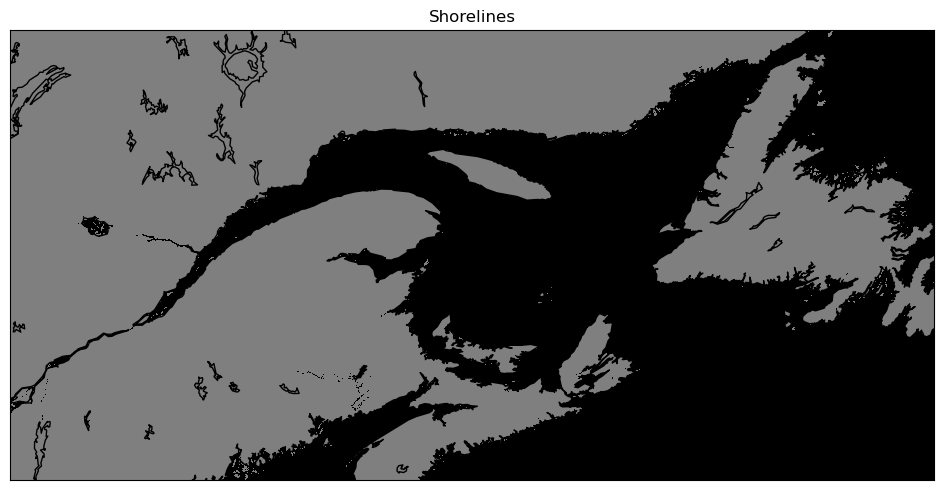

In [43]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# setting the size of the map
fig,ax = plt.subplots(figsize=(12,5))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')

# drawing the coastline
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
#m.fillcontinents(color='mediumseagreen')

x_,y_ = m(x,y)

im = ax.pcolormesh(x_,y_,coasts[:,:], norm = colors.CenteredNorm(), cmap = 'gist_yarg')
#fig.colorbar(im,ax = ax)
#127037.86805555556 48.02107 -60.52054
#plt.legend(loc = 'lower right',framealpha=1)
plt.title('Shorelines')
plt.tight_layout()
plt.show()
